<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours


### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [2]:
## Read the csv file
import pandas as pd
import seaborn as sns
df = pd.read_csv ('Airbnb_Open_Data.csv', low_memory=False)
print(df)


             id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335

In [3]:
## Display the first 5 rows
df_first_5 = df.head() 
print(df_first_5)

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

In [4]:
## Display the data types
print("\nColumn and Data types of each column:")
print(df.dtypes)



Column and Data types of each column:
id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    flo

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [5]:
columns_to_drop = ['host id', 'id', 'country', 'country code']
df.drop(columns=columns_to_drop, inplace=True)


In [6]:
print(df.columns)

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')


Columns like host id, id, country, and country code may contain information that is not relevant to the analysis you are conducting. 
Including irrelevant columns can introduce noise and make it harder to discern meaningful patterns in the data.

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [7]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = df.isnull().sum().sort_values(ascending=True)
print("Missing Values Count:")
print(missing_values)

Missing Values Count:
room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64


In [8]:
for col in df.columns:
    if df[str(col)].dtype == 'object':
        print(col)
        df[str(col)].fillna(value=df[str(col)].mode()[0], inplace=True)
    else:
        df[str(col)].fillna(value=df[str(col)].median(), inplace=True)
        
df.isnull().sum().sort_values()        


## Check whether there are any duplicate values in the dataframe and if present remove them.
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)
df_no_duplicates = df.drop_duplicates()


NAME
host_identity_verified
host name
neighbourhood group
neighbourhood
instant_bookable
cancellation_policy
room type
price
service fee
last review
house_rules
license
Duplicate Rows:
                                                     NAME  \
70825                    Penthouse Designer Loft Brooklyn   
71877                  Brooklyn, Clinton Hill, Private rm   
73083   Enormous and illuminated on top floor (long term)   
73137          Manhattan Club 1 Bedroom (Sleeps 4 adults)   
73191    SHARE;CHEAPEST;Pure;Cozy;Safe;Silent IN NEW YORK   
...                                                   ...   
102594                         Spare room in Williamsburg   
102595                      Best Location near Columbia U   
102596                     Comfy, bright room in Brooklyn   
102597                   Big Studio-One Stop from Midtown   
102598                               585 sf Luxury Studio   

       host_identity_verified    host name neighbourhood group  \
70825           

In [9]:
## Display the total number of records in the dataframe after removing the duplicates.
total_records = df_no_duplicates.shape[0]
print("Total Number of Records After Removing Duplicates:", total_records)

Total Number of Records After Removing Duplicates: 99138


## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [10]:
## Rename the column.
df = df.rename(columns={'availability 365': 'days_booked'})
print(df.head())

                                               NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !            unconfirmed   
3                               Home away from home            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

   instant_bookable cancellation_policy        room type  ...  service fee  \
0             False              stric

In [11]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Display the DataFrame with modified column names
print(df.head())

                                               name host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !            unconfirmed   
3                               Home away from home            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host_name neighbourhood_group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

   instant_bookable cancellation_policy        room_type  ...  service_fee  \
0             False              stric

In [12]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
# Check if any column contains a comma
comma_present = df.apply(lambda x: x.astype(str).str.contains(',')).any()

# Display the result
print("Comma present in columns:")
print(comma_present)

# Specify the columns containing dollar signs and commas
columns_to_clean = ['price', 'service_fee']  

# Remove dollar sign and comma, and convert to numeric
for column in columns_to_clean:
    df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True), errors='coerce')

# Display the DataFrame with modified columns
print(df.head())
print(df['price'])





Comma present in columns:
name                               True
host_identity_verified            False
host_name                          True
neighbourhood_group               False
neighbourhood                      True
lat                               False
long                              False
instant_bookable                  False
cancellation_policy               False
room_type                         False
construction_year                 False
price                              True
service_fee                       False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
review_rate_number                False
calculated_host_listings_count    False
days_booked                       False
house_rules                        True
license                           False
dtype: bool
                                               name host_identity_verified  \
0   

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [13]:
## List the count of various room types avaliable with Airbnb

room_type_counts = df['room_type'].value_counts()

print("Count of Various Room Types Available with Airbnb:")
print(room_type_counts)


Count of Various Room Types Available with Airbnb:
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: room_type, dtype: int64


In [14]:
## Which room type adheres to more strict cancellation policy
cancellation_room_type_counts = df.groupby(['cancellation_policy', 'room_type']).size().unstack()
print("Count of Room Types for Different Cancellation Policies:")
print(cancellation_room_type_counts)

Count of Room Types for Different Cancellation Policies:
room_type            Entire home/apt  Hotel room  Private room  Shared room
cancellation_policy                                                        
flexible                       17911          44         15376          743
moderate                       17962          37         15675          745
strict                         17828          35         15505          738


In [15]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
# Group by neighborhood group and calculate the average price
neighbourhood_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Display prices by neighborhood group
print("Prices by Neighborhood Group:")
print(neighbourhood_prices)

# Identify the most expensive neighborhood group
most_expensive_group = neighbourhood_prices.idxmax()
print("\nThe most expensive neighbourhood group is:", most_expensive_group)

Prices by Neighborhood Group:
neighbourhood_group
Queens           629.152484
Bronx            626.677729
Brooklyn         625.627432
Staten Island    623.175916
Manhattan        621.408320
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

The most expensive neighbourhood group is: Queens


## Task 5a: Data Visualization (Any Tool)

* List the count of various room types avaliable with Airnb
* Which room type adheres to more strict cancellation policy
* List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

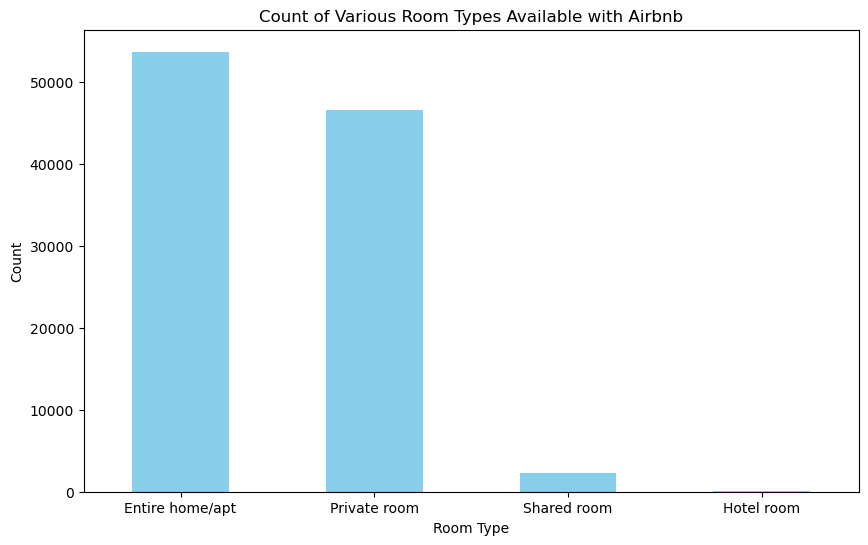

In [27]:
#List the count of various room types avaliable with Airbnb

room_type_counts = df['room_type'].value_counts()


room_type_counts = df['room_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Various Room Types Available with Airbnb')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


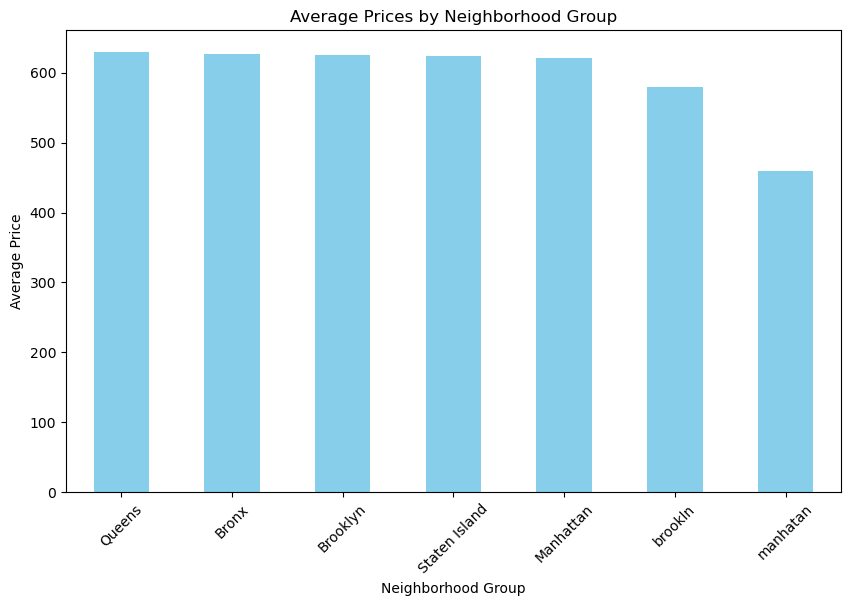


The most expensive neighbourhood group is: Queens


In [28]:
#List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
# Create a bar graph
plt.figure(figsize=(10, 6))
neighbourhood_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

# Identify the most expensive neighborhood group
most_expensive_group = neighbourhood_prices.idxmax()
print("\nThe most expensive neighbourhood group is:", most_expensive_group)

Top 10 Neighborhoods in Increasing Order of Price:
neighbourhood
Lighthouse Hill               107.666667
Spuyten Duyvil                293.444444
Rossville                     300.666667
Breezy Point                  309.888889
Richmondtown                  373.400000
Castleton Corners             417.230769
Bay Terrace, Staten Island    429.500000
Emerson Hill                  443.800000
West Farms                    463.166667
Randall Manor                 472.400000
Name: price, dtype: float64


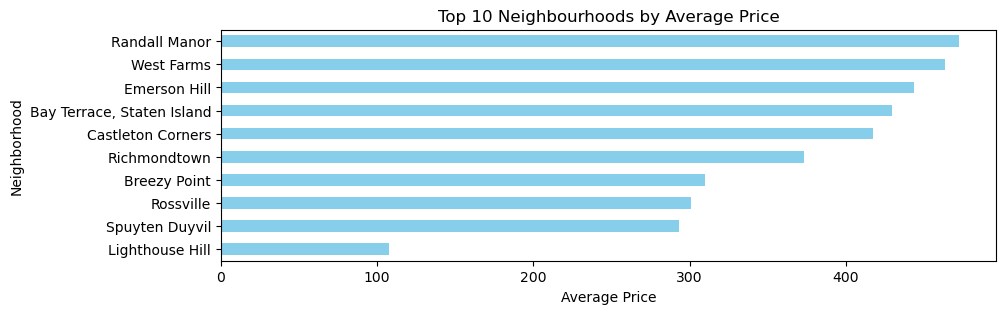


The cheapest neighbourhood is: Lighthouse Hill


In [16]:
#List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.

import matplotlib.pyplot as plt
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Group by neighbourhood and calculate the average price
neighbourhood_prices2 = df.groupby('neighbourhood')['price'].mean().sort_values()

# Select the top 10 neighborhoods
top_10_neighbourhoods = neighbourhood_prices2.head(10)

# Display the top 10 neighbourhoods in increasing order of their average prices
print("Top 10 Neighborhoods in Increasing Order of Price:")
print(top_10_neighbourhoods)

# Create a horizontal bar graph
plt.figure(figsize=(10, 3))
top_10_neighbourhoods.plot(kind='barh', color='skyblue')
plt.title('Top 10 Neighbourhoods by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

# Identify the cheapest neighbourhood
cheapest_neighbourhood = neighbourhood_prices2.idxmin()
print("\nThe cheapest neighbourhood is:", cheapest_neighbourhood)

<Axes: xlabel='minimum_nights', ylabel='neighbourhood_group'>

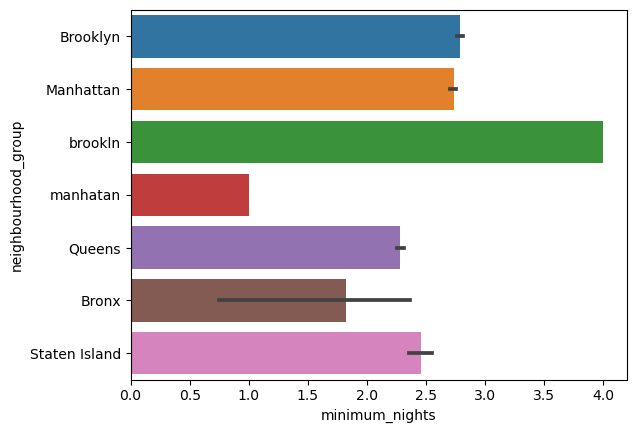

In [17]:
#List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph

# Convert the 'minimum_nights' column to numeric
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')

# Filter neighborhoods with availability within 10 days
short_term_neighbourhoods = df[df['minimum_nights'] <= 10]
short_term_neighbourhoods['neighbourhood_group'].value_counts()


import seaborn as sns
sns.barplot(x='minimum_nights', y='neighbourhood_group', data=short_term_neighbourhoods, orient='h')

# Create a bar graph
#plt.figure(figsize=(10, 6))
#short_term_neighbourhoods.plot(kind='bar', color='skyblue')
#plt.title('Neighbourhoods Offering Short-Term Rentals Within 10 Days')
#plt.xlabel('Neighbourhood')
#plt.ylabel('Number of Listings')
#plt.show()

Prices with Respect to Room Type:
room_type
Entire home/apt    624.044301
Private room       624.053355
Shared room        632.593441
Hotel room         668.465517
Name: price, dtype: float64


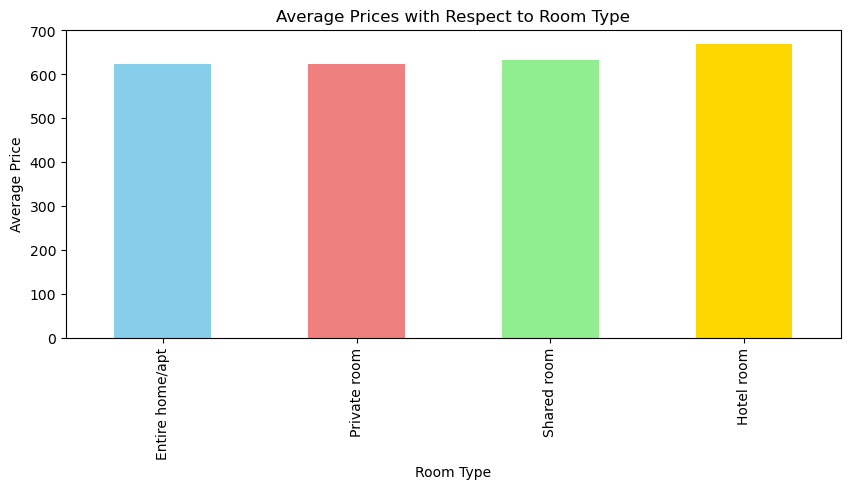

In [18]:
#List the prices with respect to room type using a bar graph and also state your inferences.
# Group by room type and calculate the average price
room_type_prices = df.groupby('room_type')['price'].mean().sort_values()

# Display the prices with respect to room type
print("Prices with Respect to Room Type:")
print(room_type_prices)

# Create a bar graph
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']  # Add more colors as needed
plt.figure(figsize=(10, 4))
room_type_prices.plot(kind='bar', color=colors)
plt.title('Average Prices with Respect to Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

Booking Statistics by Neighborhood Group:
  neighbourhood_group  days_booked
0             brookln    47.000000
1            Brooklyn   129.656517
2           Manhattan   141.916684
3              Queens   161.528605
4               Bronx   178.550147
5       Staten Island   197.164398
6            manhatan   325.000000


Text(0.5, 1.0, 'Distribution of Booked Days for Each Neighborhood Group')

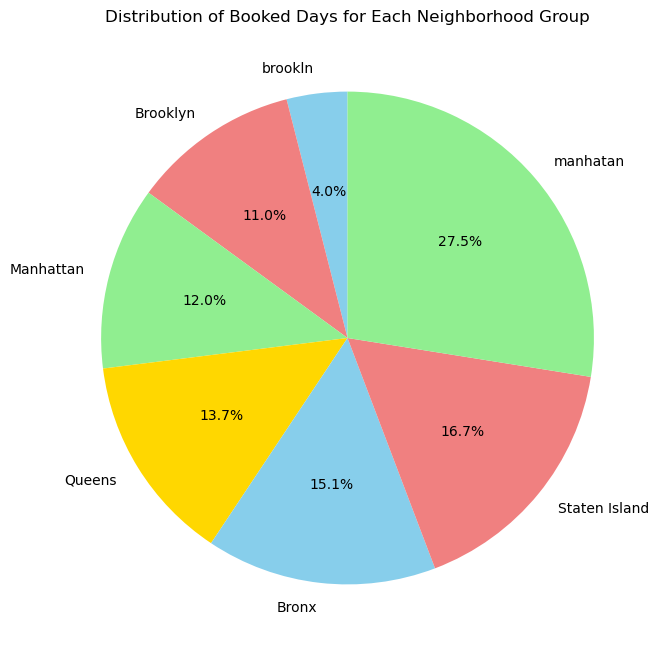

In [19]:
#Create a pie chart that shows distribution of booked days for each neighborhood group .
#Which neighborhood has the highest booking percentage.

neighborhood_booking_stats = df['days_booked'].groupby(df['neighbourhood_group']).mean().sort_values().reset_index()

# Display the booking statistics
print("Booking Statistics by Neighborhood Group:")
print(neighborhood_booking_stats)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(neighborhood_booking_stats['days_booked'], labels=neighborhood_booking_stats['neighbourhood_group'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Distribution of Booked Days for Each Neighborhood Group')

## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

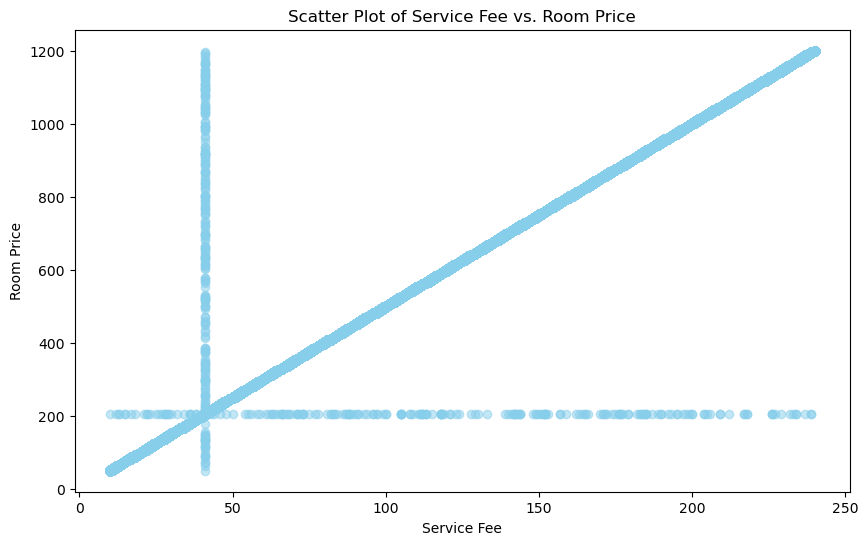

In [20]:
#Does service price and room price have an impact on each other.
#Illustrate this relationship with a scatter plot and state your inferences

# Convert the columns to numeric after removing dollar signs and commas
df['service_fee'] = pd.to_numeric(df['service_fee'].replace('[\$,]', '', regex=True), errors='coerce')
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['service_fee'], df['price'], alpha=0.5, color='skyblue')
plt.title('Scatter Plot of Service Fee vs. Room Price')
plt.xlabel('Service Fee')
plt.ylabel('Room Price')
plt.show()

#STATE:service price and room price shows strong linear relationship between the two variables.
#Also shows  positive  correlation between service price and room price.


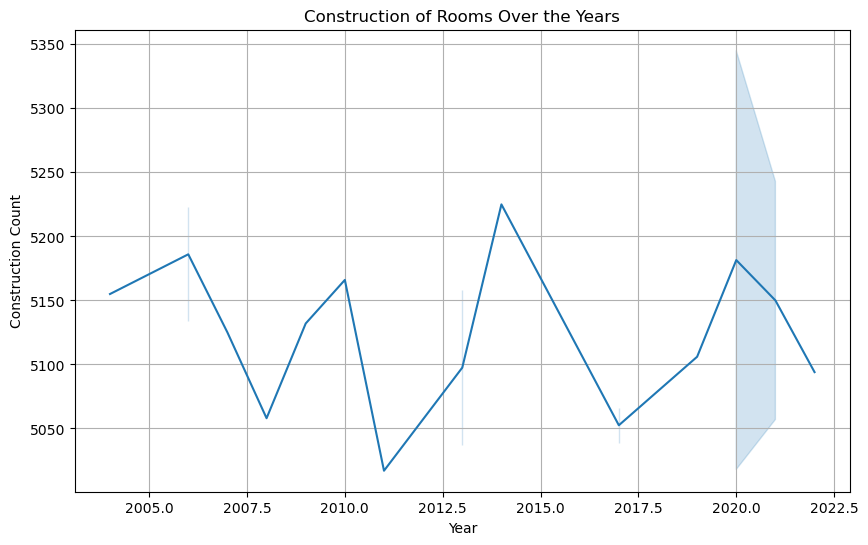

In [21]:
#Using a line graph show in which year the maximum construction of rooms took place.
import seaborn as sns
# Create a line graph
plt.figure(figsize=(10, 6))
df['construction_year_counts']=df['construction_year'].value_counts()
sns.lineplot(x='construction_year', y='construction_year_counts', data=df)
#plt.plot(df['construction_year'], df['construction_year_counts'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Construction of Rooms Over the Years')
plt.xlabel('Year')
plt.ylabel('Construction Count')
plt.grid(True)
plt.show()

## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

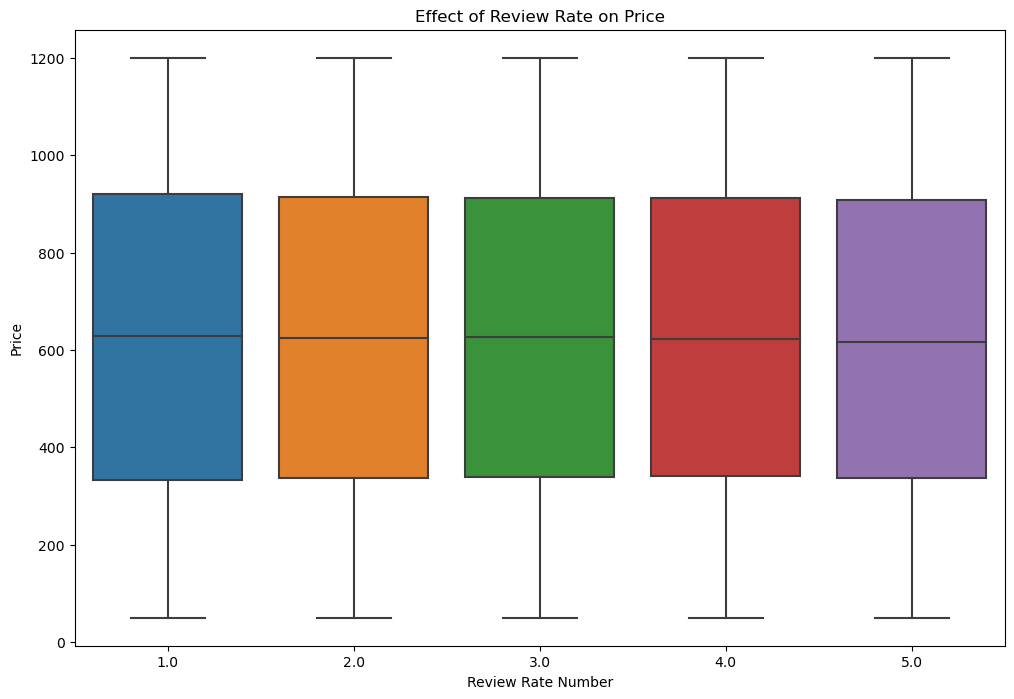

In [22]:
 #With the help of box plots illustrate the following
    #Effect of Review Rate number on price

    
# Convert the 'price' column to numeric after removing dollar signs and commas
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='review_rate_number', y='price', data=df)
plt.title('Effect of Review Rate on Price')
plt.xlabel('Review Rate Number')
plt.ylabel('Price')
plt.show()    


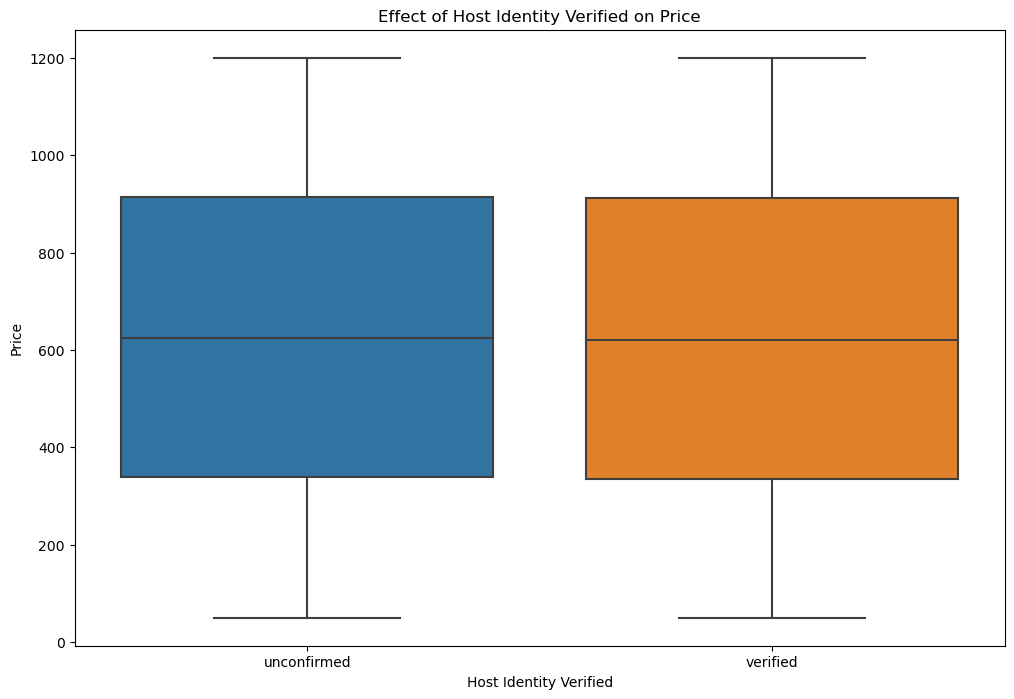

In [23]:
#With the help of box plots illustrate the following
#Effect of host identity verified on price

# Convert the 'price' column to numeric after removing dollar signs and commas
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='host_identity_verified', y='price', data=df)
plt.title('Effect of Host Identity Verified on Price')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.show()